<a href="https://colab.research.google.com/github/Abhilash11Addanki/DeepLearning/blob/main/Iris_Poetry_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2021-05-11 18:41:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.002s  

2021-05-11 18:41:03 (29.6 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [4]:
data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")
print(corpus)
print(len(corpus))

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then came a lusty sailor', 'who chanced to pass my way', 'and stole my bunch of thyme away', 'the sailor gave to me a rose', 'a rose that never would decay', 'he gave it to me to keep me reminded', 'of when he stole my thyme away', 'sleep, my child, and peace attend thee', 'all through the night', 'guardian angels god will send thee', 'soft the drowsy hours are creeping', 'hill and dale in slumber sleeping', 'i my loving vigil keeping', 'while the moon her watch is keeping', 'while the weary world is sleeping', 'oer thy spirit gently stealing', 'visions of delight revealing', 'breathes a pure 

In [13]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
total_words = len(word_index)+1
print(total_words)

2691


In [14]:
input_seq = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

max_seq_len = max([len(x) for x in input_seq])
input_seq = np.array(pad_sequences(input_seq,maxlen=max_seq_len,padding='pre'))

xs,labels = input_seq[:,:-1],input_seq[:,-1]
ys = tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_words,100,input_length=max_seq_len-1),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
                                    tf.keras.layers.Dense(total_words,activation='softmax')])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           269100    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 2691)              809991    
Total params: 1,380,291
Trainable params: 1,380,291
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy')>0.99:
      print("\nReached 99% accuracy so training cancelled")
      self.model.stop_training = True

In [20]:
history = model.fit(xs,ys,epochs=100,callbacks=[myCallback()])

Epoch 1/100
377/377 [==============================] - 37s 9ms/step - loss: 6.9736 - accuracy: 0.0615
Epoch 2/100
377/377 [==============================] - 4s 9ms/step - loss: 6.2354 - accuracy: 0.0697
Epoch 3/100
377/377 [==============================] - 3s 9ms/step - loss: 5.9723 - accuracy: 0.0820
Epoch 4/100
377/377 [==============================] - 3s 9ms/step - loss: 5.5976 - accuracy: 0.0992
Epoch 5/100
377/377 [==============================] - 3s 9ms/step - loss: 5.1930 - accuracy: 0.1208
Epoch 6/100
377/377 [==============================] - 3s 9ms/step - loss: 4.8295 - accuracy: 0.1388
Epoch 7/100
377/377 [==============================] - 3s 9ms/step - loss: 4.4187 - accuracy: 0.1697
Epoch 8/100
377/377 [==============================] - 3s 9ms/step - loss: 4.0547 - accuracy: 0.1949
Epoch 9/100
377/377 [==============================] - 4s 10ms/step - loss: 3.6533 - accuracy: 0.2530
Epoch 10/100
377/377 [==============================] - 3s 9ms/step - loss: 3.3618 - accu

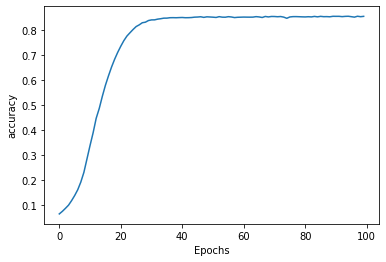

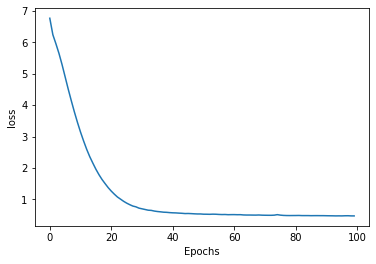

In [21]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

In [22]:
seed_text = "I've got a bad feeling about this"
next_words = 100

In [25]:
for i in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen=max_seq_len-1,padding='pre')
  predicted = model.predict_classes(token_list,verbose = 0)
  output_word = ""
  for word,index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " "+output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I've got a bad feeling about this day wore an father town for a paddys town dawn across the town of a call night a boo fray down some very green tree up the counter pipe the new fell on green green green golden hair irish loud today brave end to your mind slaughter died whispering daylight prince full to smother again times i spent to the tiny goin daylight were dear of fray cold did say an end raking moonlight behind side to her molly side by moonlight home in our darlin sportin jenny stood god youre watched her ceannt and does her landed on the
